# Исследование объявлений о продаже квартир

**Цель:** В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Необходимо определить, какие параметры и как влияют на рыночную стоимость объектов недвижимости.  

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении



**План работ**

Выполним предобработку данных и далее рассмотрим какие параметры могут потенциально повлиять на рыночную стоимость объекта недвижимости, изучим их и определим какие из них действительно оказывают влияние. Параметры: общая площадь, жилая площадь, площадь кухни, количество комнат, высота потолков, этаж квартиры, общее количество этажей в доме, расстояние до центра города, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, дата публикации объявления, сколько дней было размещено объявление.


## Изучение и предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv('real_estate_data.csv', sep='\t')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
pd.set_option('display.max_columns', 50) 
display(data.head(7))


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


In [4]:
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


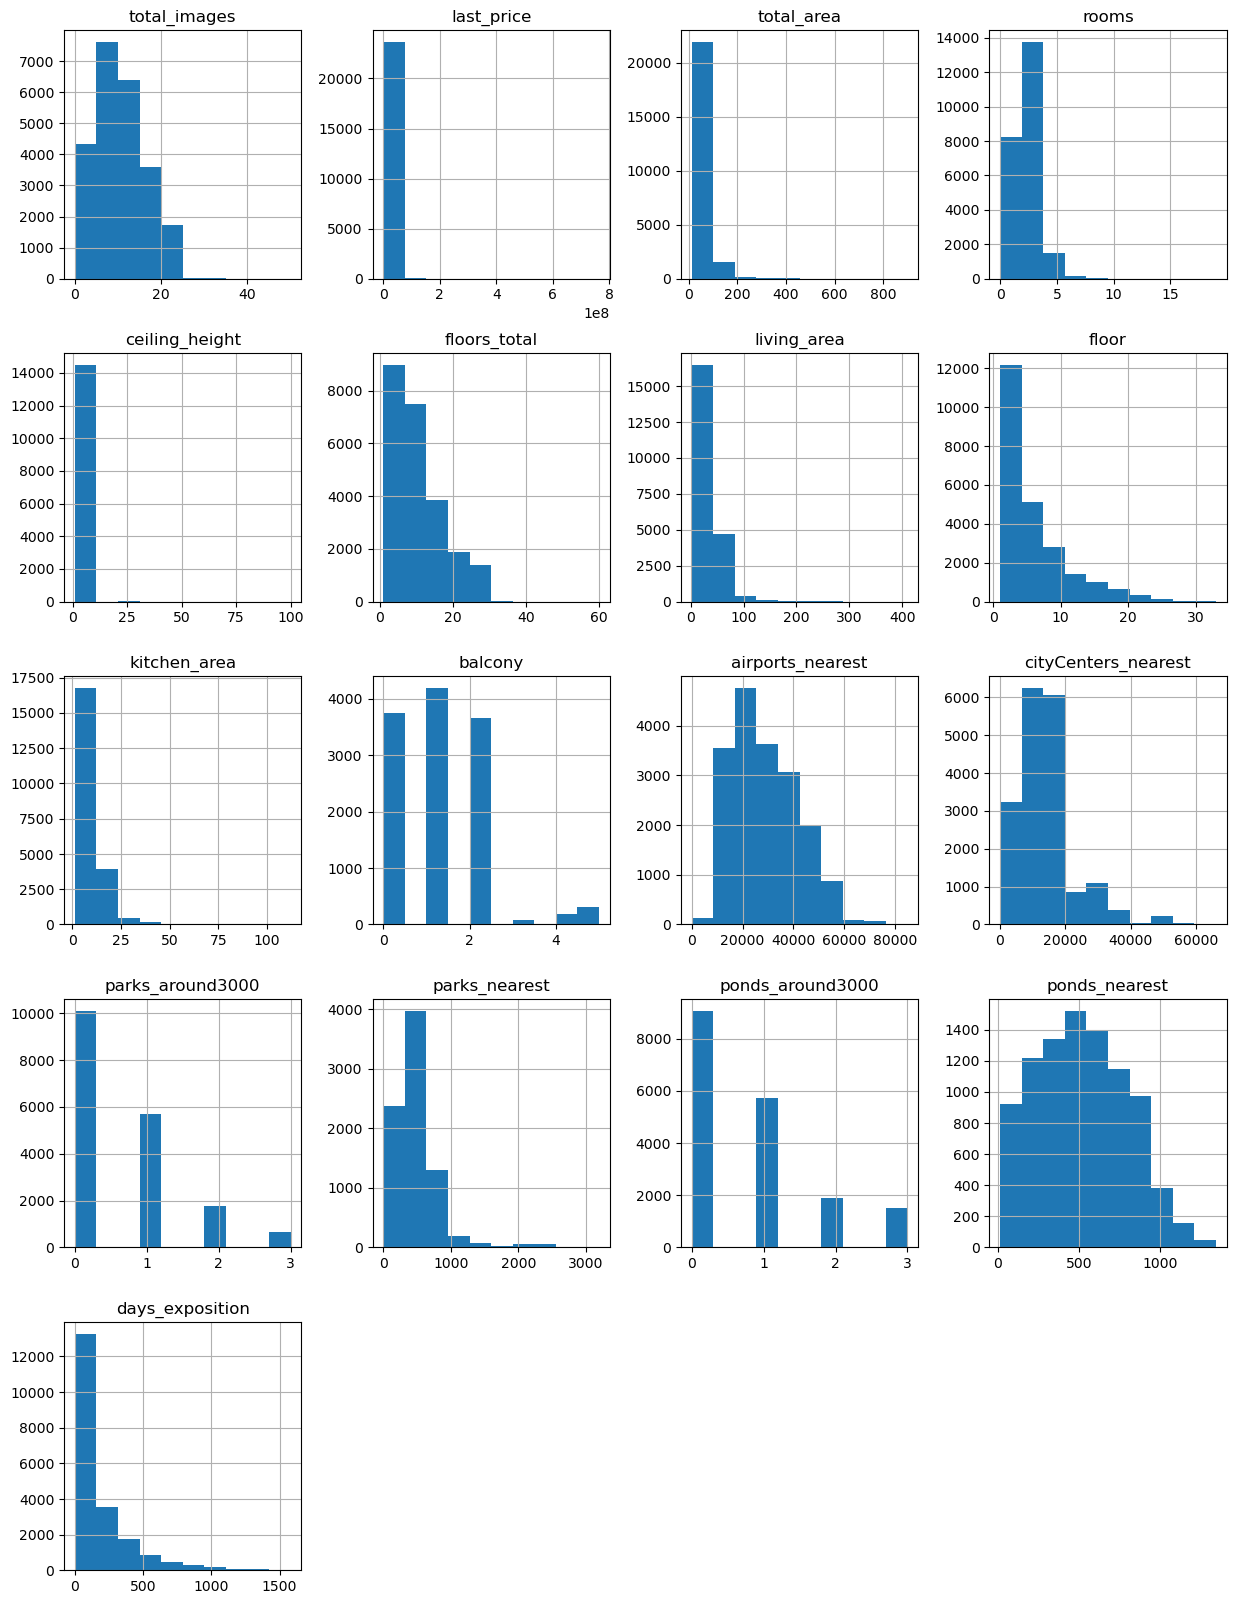

In [5]:
data.hist(figsize=(15, 20));

In [79]:
data.isna().sum()

total_images                  0
last_price                    0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height                0
floors_total                 86
living_area                   0
floor                         0
is_apartment                  0
studio                        0
open_plan                     0
kitchen_area                  0
balcony                       0
locality_name                49
airports_nearest           5532
cityCenters_nearest        5509
parks_around3000           5508
parks_nearest             15600
ponds_around3000           5508
ponds_nearest             14571
days_exposition            3175
size_category                 0
one_square_meter_price        0
weekday                       0
month                         0
year                          0
floor_type                    0
distance_to_center         5509
dtype: int64

При изучении данных были обнаружены пропуски в столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_neares, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.

Ниже рассмотрим подробнее заполнение пропусков в каждом из столбцов:

Видим, что в **locality_name** мало пропусков, всего 49 из 23699 строк датасета. В **floors_total**
тоже мало пропусков, 86 из 23699 строк датасета. Скорее всего пользователи случайно не вписали данные в эти столбцы, смысловой нагрузки для анализа данных эти пропуски не несут. Такое малое количество по каждому из столбцов составляет меньше 1 процента и поэтому ни на что не повлияет. В столбце locality_name не будем заменять на ноль, чтобы сохранить тип текстовых данных, оставим пропуски в столбце floors_total, чтобы не возникало потенциальных несоответствий между столбцами floor (где указан этаж от одного и выше) и floors_total (где указано ноль этажей). Полностью не будем удалять строки с этими пропусками тк в них может быть важная информация.


В столбце **balcony** много пропусков и скорее всего они означают, что балкона нет, потому не указано количество балконов. Заменим эти пропуски на 0.


In [7]:
data['balcony']=data['balcony'].fillna(0)

В **ceiling_height** много пропусков, возможно пользователи случайно не внесли данные, а может быть намеренно. Потенциально высокие потолки могут быть в старых, больших квартирах, расположенных в центре, либо в новостройках с большой кухней. Проверим нашу гипотезу по коэффициенту Пирсона. 

In [8]:
display(data['ceiling_height'].corr(data['kitchen_area']))
display(data['ceiling_height'].corr(data['total_area']))
display(data['ceiling_height'].corr(data['cityCenters_nearest']))

0.08764065561112469

0.09549044852366353

-0.09168887614722748

Судя по коэффициенту Пирсона корреляции высоты потолков с общей площадью, площадью кухни, местоположением от центра нет, либо она носит более сложный, не линейный характер. Значит не будем делать категоризацию по какому-либо столбцу, а просто найдем медианную высоту потолков и заполним пропуски. Лучше использовать медиану, а не среднее арифметическое, чтобы уменьшить влияние возможных пиковых значений.


In [9]:
display(data['ceiling_height'].median()) 

2.65

Значение медины выглядит реалистичным, заполним пропуски:

In [10]:
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())

Рассмотрим столбец **days_exposition**, в нем достаточно много пропусков, возможно они связаны с тем, что объявление было только размещено и возможно объект недвижимости был продан в тот же день, либо объявление просто сняли тк передумали продавать объект недвижимости, либо по старым объявлениям нет информации о длительности размещения, либо вне зависимости от даты размещения просто нет информации о длительности размещения, например ее не заполнили случайно или намеренно, либо произошла техническая ошибка при подсчете дней размещения.

А может быть в этом столбце уже есть нулевые значения, которые отражают тот факт, что объявление только что разместили, а пропуски связаны с чем-то другим. Проверим, есть ли нулевые значения в столбце days_exposition.


In [11]:
display(data.sort_values(by='days_exposition').head()) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1632,19,4000000.0,49.9,2019-05-01T00:00:00,2,2.50,9.0,25.0,1,NaN,False,False,10.0,0.0,Санкт-Петербург,13567.0,14384.0,1.0,20.0,1.0,681.0,1.0
16053,4,4070000.0,45.1,2019-04-30T00:00:00,2,2.65,5.0,22.7,3,NaN,False,False,6.6,0.0,Санкт-Петербург,40859.0,11668.0,2.0,485.0,0.0,NaN,2.0
13061,20,6100000.0,51.4,2019-04-29T00:00:00,2,3.00,5.0,31.7,4,NaN,False,False,6.9,1.0,Санкт-Петербург,10776.0,9389.0,0.0,NaN,0.0,NaN,2.0
16212,0,7806000.0,25.0,2019-04-30T00:00:00,1,3.00,5.0,NaN,5,False,False,False,NaN,0.0,Санкт-Петербург,36525.0,10302.0,0.0,NaN,0.0,NaN,2.0
18680,9,3200000.0,36.8,2018-03-20T00:00:00,1,2.60,10.0,17.8,6,NaN,False,False,8.2,1.0,Санкт-Петербург,36908.0,12117.0,0.0,NaN,0.0,NaN,3.0


Минимальное значение в столбце days_exposition это 1, нет нулей. Далее проверим не связаны ли пропуски в days_exposition с датой первичного размещения, возможно для более старых объявлений нет информации.

In [12]:
data_pivot = data.pivot_table(index='first_day_exposition', values='days_exposition', aggfunc='count')
display(data_pivot.sort_values(by='days_exposition', ascending=False).tail(25))


,days_exposition
first_day_exposition,
2015-01-29T00:00:00,1
2015-09-08T00:00:00,1
2018-12-01T00:00:00,1
2018-12-02T00:00:00,1
2015-09-09T00:00:00,1
2016-01-05T00:00:00,1
2019-04-27T00:00:00,0
2019-04-28T00:00:00,0
2015-05-09T00:00:00,0


Пропуски появляются по всем годам в случайном порядке. 

Таким образом, по некоторым объектам недвижимости просто нет информации о длительности размещения объявления. Не будем заполнять нулями этот столбец days_exposition, чтобы не искажать данные, будто бы объекты недвижимости были проданы в день размещения объявления.

В столбце **is_apartment** много пропусков, а значения True или False показывают является ли объект недвижимости апартаментами. Cкорее всего пропуски означают, что это не апартаменты и информацию не внесли. Заполним пропуски в этом столбце False.

In [13]:
data['is_apartment']=data['is_apartment'].fillna(False)

Рассмотрим пропуски в столбцах **living_area** и **kitchen_area**. Пропуски могли возникнуть тк пользователь случайно или намеренно не внес данные, кроме того пропуски в kitchen_area могут быть обнаружены в больших количествах в студиях или жилых помещениях открытой планировки, проверим эту гипотезу.

In [14]:
studio_or_open_plan=data.query('studio==True or open_plan==True')
display(studio_or_open_plan.isna().sum()) 

total_images              0
last_price                0
total_area                0
first_day_exposition      0
rooms                     0
ceiling_height            0
floors_total              3
living_area              15
floor                     0
is_apartment              0
studio                    0
open_plan                 0
kitchen_area            216
balcony                   0
locality_name             0
airports_nearest         87
cityCenters_nearest      87
parks_around3000         87
parks_nearest           184
ponds_around3000         87
ponds_nearest           141
days_exposition          14
dtype: int64

Таких пропусков в kitchen_area не так много, 216 из 2278, однако они есть, заменим эти 216 пропуском нулями.

In [15]:
rows = (data['studio'] == True) | (data['open_plan'] == True)
data.loc[rows, 'kitchen_area'] = 0
display(data.isna().sum()) 


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2062
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Осталось 2062 пропуска в kitchen_area. Далее проверим по коэффициенту Пирсона есть ли корреляция total_area и living_area, а также total_area с kitchen_area.

In [16]:
display(data['total_area'].corr(data['living_area']))
display(data['total_area'].corr(data['kitchen_area']))

0.9395373338721495

0.6106910052662858

Видим сильную корреляцию между total_area и living_area поэтому сделаем категоризацию на основе total_area, найдем медианы living_area в каждой категории и заполним соответствующие пропуски в столбцах living_area медианами в зависимости от категории. kitchen_area найдем как (total_area - living_area)/2 тк обычно площадь кухни примерно равна площади санузла и коридора вместе взятых.

In [17]:
display(data['total_area'].sort_values())

def size (total_area):
    
    """
    Возвращает размер объекта недвижимости в зависимости от площади total_area, используя правила:
    - 'маленькие', если area <= 60 кв. метров;
    - 'средние', если area <= 200 кв. метров;
    - 'большие', если area <= 400 кв. метров;
    - 'очень большие', если area <= 500 кв. метров;
    - 'огромные', если area <= 900 кв. метров.
    """

        
    if total_area <= 60:
        return 'маленькие'
    if total_area  <= 200:
        return 'средние'
    if total_area  <= 400:
        return 'большие'
    if total_area  <= 500:
        return 'очень большие'
    return 'огромные' 


data['size_category'] = data['total_area'].apply(size)
display(data.head(10)) 


19904     12.0
17961     13.0
19546     13.0
19807     13.0
19558     13.2
         ...  
5358     590.0
15651    618.0
3117     631.0
12859    631.2
19540    900.0
Name: total_area, Length: 23699, dtype: float64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,size_category
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,средние
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,маленькие
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,маленькие
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,средние
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,средние
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,маленькие
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,маленькие
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,средние
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,маленькие
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,средние


In [18]:
mediana_living_area=data.groupby('size_category')['living_area'].median().to_dict()    
    

for item in data['size_category'].unique():
    data.loc[(data['size_category']==item) & (data['living_area'].isna()), 'living_area'] = data['living_area'].fillna(mediana_living_area.get(item))


#data.groupby('size_category')['living_area'].transform('median')     
    
display(data.head(10))


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,size_category
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,средние
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,маленькие
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,маленькие
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,46.00,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,средние
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,средние
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,маленькие
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,маленькие
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,46.00,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,средние
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,маленькие
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,средние


In [19]:
data['kitchen_area']=data['kitchen_area'].fillna((data['total_area']-data['total_area'])/2)

В столбцах **airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest** пропуски скорее всего связаны с тем, что рядом нет ни аэропорта, ни центра города, ни парка, ни пруда, однако не будем заменять пропуски на 0, чтобы не возникало искажений, как-будто до перечисленных выше объектов ноль км. Также по имеющимся данным мы не можем каким-то образом рассчитать расстояния и заполнить столбцы. Оставим пропуски как есть, это поможет нам видеть, что рядом нет интересующих объектов.

В итоге у нас должны остаться пропуски в столбцах **floors_total, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest**.
Проверка ниже это подтверждает.

In [20]:
display(data.isna().sum()) 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
size_category               0
dtype: int64

Далее определим для каких данных нужно поменять тип данных, для этого вызовем метод info(). 

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видим, что только **first_day_exposition** нуждается в замене. Поменяем тип данных для first_day_exposition в формат datetime64 для дальнейшей работы с датами. 

In [22]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S'
)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [23]:
display(data['locality_name'].sort_values().unique())

data['locality_name']=data['locality_name'].str.lower()
data['locality_name']=data['locality_name'].str.replace('ё', 'е')
data['locality_name']=data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name']=data['locality_name'].str.replace('деревня', 'поселок')
data['locality_name']=data['locality_name'].str.replace('село', 'поселок')
data['locality_name']=data['locality_name'].str.replace('попопоселоккк', 'поселок')
data['locality_name']=data['locality_name'].str.replace('попоселокк', 'поселок')
data['locality_name']=data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name']=data['locality_name'].str.replace('коттеджный поселок', 'поселок')
data['locality_name']=data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'поселок')
data['locality_name']=data['locality_name'].str.replace('садовое товарищество', 'поселок')

display(data['locality_name'].sort_values().unique())

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'зеленогорск', 'ивангород', 'каменногорск',
       'кингисепп', 'кириши', 'кировск', 'колпино', 'коммунар',
       'красное поселок', 'кронштадт', 'кудрово', 'лодейное поле',
       'ломоносов', 'луга', 'любань', 'мурино', 'никольское',
       'новая ладога', 'отрадное', 'павловск', 'петергоф', 'пикалево',
       'подпорожье', 'поселок агалатово', 'поселок александровская',
       'поселок алексеевка', 'поселок аннино', 'поселок аро',
       'поселок барышево', 'поселок батово', 'поселок бегуницы',
       'поселок белогорка', 'поселок белоостров', 'поселок большая вруда',
       'поселок большая ижора', 'поселок большая пустомержа',
       'поселок большие колпаны', 'поселок большое рейзино',
       'поселок большой сабск', 'поселок бор', 'поселок борисова грива',
       'поселок бугры', 'поселок будогощь', 'поселок ваганово',
       'поселок важины', 'поселок вартемяги', 'поселок вахнова к

Проверим есть ли аномалии в данных

In [24]:
data['total_images'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35,
       37, 39, 42, 50], dtype=int64)

In [25]:
data['last_price'].sort_values().unique()

array([1.219e+04, 4.300e+05, 4.400e+05, ..., 4.013e+08, 4.200e+08,
       7.630e+08])

In [26]:
data['total_area'].sort_values().unique()

array([ 12. ,  13. ,  13.2, ..., 631. , 631.2, 900. ])

In [27]:
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19],
      dtype=int64)

In [28]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [29]:
data['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

In [30]:
data['living_area'].sort_values().unique()

array([  2. ,   3. ,   5. , ..., 347.5, 409. , 409.7])

In [31]:
data['floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

In [32]:
data['kitchen_area'].sort_values().unique()

array([  0.  ,   1.3 ,   2.  ,   2.3 ,   2.4 ,   2.89,   3.  ,   3.2 ,
         3.3 ,   3.4 ,   3.5 ,   3.7 ,   3.8 ,   4.  ,   4.1 ,   4.2 ,
         4.3 ,   4.4 ,   4.5 ,   4.6 ,   4.7 ,   4.8 ,   4.9 ,   5.  ,
         5.04,   5.06,   5.1 ,   5.14,   5.2 ,   5.21,   5.23,   5.25,
         5.28,   5.29,   5.3 ,   5.31,   5.33,   5.35,   5.4 ,   5.42,
         5.44,   5.47,   5.49,   5.5 ,   5.53,   5.59,   5.6 ,   5.61,
         5.62,   5.64,   5.65,   5.68,   5.7 ,   5.74,   5.75,   5.78,
         5.8 ,   5.82,   5.85,   5.86,   5.9 ,   5.91,   6.  ,   6.02,
         6.03,   6.1 ,   6.16,   6.19,   6.2 ,   6.22,   6.23,   6.24,
         6.25,   6.26,   6.27,   6.28,   6.3 ,   6.31,   6.33,   6.35,
         6.36,   6.37,   6.4 ,   6.47,   6.5 ,   6.55,   6.58,   6.6 ,
         6.61,   6.62,   6.65,   6.7 ,   6.72,   6.73,   6.76,   6.77,
         6.8 ,   6.82,   6.83,   6.84,   6.86,   6.9 ,   6.91,   6.93,
         6.95,   7.  ,   7.02,   7.03,   7.06,   7.09,   7.1 ,   7.12,
      

In [33]:
data['balcony'].sort_values().unique()

array([0., 1., 2., 3., 4., 5.])

In [34]:
data['airports_nearest'].sort_values().unique()

array([    0.,  6450.,  6914., ..., 84853., 84869.,    nan])

In [35]:
data['cityCenters_nearest'].sort_values().unique()

array([  181.,   208.,   215., ..., 65952., 65968.,    nan])

In [36]:
data['parks_around3000'].sort_values().unique()

array([ 0.,  1.,  2.,  3., nan])

In [37]:
data['parks_nearest'].sort_values().unique()

array([1.000e+00, 3.000e+00, 4.000e+00, 7.000e+00, 9.000e+00, 1.000e+01,
       1.100e+01, 1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01,
       1.700e+01, 1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01,
       2.300e+01, 2.400e+01, 2.700e+01, 2.800e+01, 3.000e+01, 3.200e+01,
       3.300e+01, 3.400e+01, 3.500e+01, 3.600e+01, 3.700e+01, 3.800e+01,
       3.900e+01, 4.000e+01, 4.100e+01, 4.200e+01, 4.300e+01, 4.400e+01,
       4.500e+01, 4.600e+01, 4.700e+01, 4.800e+01, 4.900e+01, 5.000e+01,
       5.100e+01, 5.200e+01, 5.300e+01, 5.400e+01, 5.500e+01, 5.600e+01,
       5.700e+01, 5.800e+01, 5.900e+01, 6.000e+01, 6.100e+01, 6.200e+01,
       6.300e+01, 6.400e+01, 6.500e+01, 6.600e+01, 6.700e+01, 6.800e+01,
       6.900e+01, 7.100e+01, 7.200e+01, 7.300e+01, 7.400e+01, 7.500e+01,
       7.600e+01, 7.700e+01, 7.800e+01, 8.000e+01, 8.100e+01, 8.200e+01,
       8.300e+01, 8.400e+01, 8.500e+01, 8.600e+01, 8.700e+01, 8.800e+01,
       9.000e+01, 9.100e+01, 9.200e+01, 9.300e+01, 

In [38]:
data['ponds_around3000'].sort_values().unique()

array([ 0.,  1.,  2.,  3., nan])

In [39]:
data['ponds_nearest'].sort_values().unique()

array([  13.,   16.,   19., ..., 1341., 1344.,   nan])

In [40]:
data['days_exposition'].sort_values().unique()

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.572e+03, 1.580e+03,
             nan])

В столбце ceiling_height видим аномальные значения, как слишком низкие так и слишком высокие. Планируем заменить значения 20, 22.6, 24, 25, 26, 27, 27.5, 32 тк скорее всего это высота потолков 2, 2.26, 2.4, 2.5, 2.6, 2.7, 2.75, 3.2 и удалим слишком маленькие значения 1, 1.2, 1.75 и слишком высокие значения 14, 100.
Также в столбце total_area сильно выделяющееся значение 900, скорее всего его уберем.

Прежде чем убрать значения, оценим сколько в процентах они составляют от всех значений по каждому столбцу.
Найдем общее количество строк в столбцах ceiling_height и total_area, затем количество квартир с выбивающимися значениями.

In [41]:
display(data.count())

total_images            23699
last_price              23699
total_area              23699
first_day_exposition    23699
rooms                   23699
ceiling_height          23699
floors_total            23613
living_area             23699
floor                   23699
is_apartment            23699
studio                  23699
open_plan               23699
kitchen_area            23699
balcony                 23699
locality_name           23650
airports_nearest        18157
cityCenters_nearest     18180
parks_around3000        18181
parks_nearest            8079
ponds_around3000        18181
ponds_nearest            9110
days_exposition         20518
size_category           23699
dtype: int64

In [42]:
print(data.groupby('ceiling_height')['total_area'].count().tail(10)) 
print(data.groupby('ceiling_height')['total_area'].count().head(10)) 
print(data.groupby('total_area')['total_area'].count().tail(10)) 


ceiling_height
14.0     1
20.0     1
22.6     1
24.0     1
25.0     7
26.0     1
27.0     8
27.5     1
32.0     2
100.0    1
Name: total_area, dtype: int64
ceiling_height
1.00     1
1.20     1
1.75     1
2.00    11
2.20     1
2.25     1
2.30     4
2.34     1
2.40    23
2.45    15
Name: total_area, dtype: int64
total_area
494.1    1
495.0    1
500.0    2
507.0    1
517.0    1
590.0    1
618.0    1
631.0    1
631.2    1
900.0    1
Name: total_area, dtype: int64


Видим, что в каждом из столбцов ceiling_height и total_area по 23699 значений. 
По одному значению для каждой высоты потолков:1, 1.2, 1.75, 14, 100. Всего 5 квартир. Таким образом, процент потери=5/23699=0.0002, а именно 0,02%
В столбце total_area 1 квартира с площадью 900,  процент потери=1/23699=0.00004, а именно 0,004%
Значит можем отбросить эти значения.

In [43]:
data['ceiling_height']=data['ceiling_height'].replace('20', '2')
data['ceiling_height']=data['ceiling_height'].replace('22.6', '2.26')
data['ceiling_height']=data['ceiling_height'].replace('24', '2.4')
data['ceiling_height']=data['ceiling_height'].replace('25', '2.5')
data['ceiling_height']=data['ceiling_height'].replace('26', '2.6')
data['ceiling_height']=data['ceiling_height'].replace('27', '2.7')
data['ceiling_height']=data['ceiling_height'].replace('27.5', '2.75')
data['ceiling_height']=data['ceiling_height'].replace('32', '3.2')
data=data[data['ceiling_height']>=2]
data=data[data['ceiling_height']<14]

In [44]:
data['ceiling_height'].sort_values().unique()

array([ 2.  ,  2.2 ,  2.25,  2.3 ,  2.34,  2.4 ,  2.45,  2.46,  2.47,
        2.48,  2.49,  2.5 ,  2.51,  2.52,  2.53,  2.54,  2.55,  2.56,
        2.57,  2.58,  2.59,  2.6 ,  2.61,  2.62,  2.63,  2.64,  2.65,
        2.66,  2.67,  2.68,  2.69,  2.7 ,  2.71,  2.72,  2.73,  2.74,
        2.75,  2.76,  2.77,  2.78,  2.79,  2.8 ,  2.81,  2.82,  2.83,
        2.84,  2.85,  2.86,  2.87,  2.88,  2.89,  2.9 ,  2.91,  2.92,
        2.93,  2.94,  2.95,  2.96,  2.97,  2.98,  2.99,  3.  ,  3.01,
        3.02,  3.03,  3.04,  3.05,  3.06,  3.07,  3.08,  3.09,  3.1 ,
        3.11,  3.12,  3.13,  3.14,  3.15,  3.16,  3.17,  3.18,  3.2 ,
        3.21,  3.22,  3.23,  3.24,  3.25,  3.26,  3.27,  3.28,  3.29,
        3.3 ,  3.31,  3.32,  3.33,  3.34,  3.35,  3.36,  3.37,  3.38,
        3.39,  3.4 ,  3.42,  3.43,  3.44,  3.45,  3.46,  3.47,  3.48,
        3.49,  3.5 ,  3.51,  3.52,  3.53,  3.54,  3.55,  3.56,  3.57,
        3.58,  3.59,  3.6 ,  3.62,  3.63,  3.65,  3.66,  3.67,  3.68,
        3.69,  3.7 ,

Также удалим в столбце total_area сильно выделяющееся значение 900 и сделаем проверку.

In [45]:
data=data[data['total_area']<900]
data['total_area'].sort_values().unique()

array([ 12. ,  13. ,  13.2, ..., 618. , 631. , 631.2])

Добавим в таблицу новые столбцы:

In [46]:
data['one_square_meter_price']=data['last_price']/data['total_area']
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,size_category,one_square_meter_price
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.00,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,средние,120370.370370
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.00,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,маленькие,82920.792079
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.30,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,маленькие,92785.714286
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,46.0,9,False,False,False,0.00,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,средние,408176.100629
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.00,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,средние,100000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,False,False,13.83,0.0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,средние,72490.845228
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,False,False,8.50,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,маленькие,52542.372881
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,False,False,0.00,0.0,поселок рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,маленькие,44091.710758
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,46.0,12,False,False,False,23.30,2.0,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,средние,149511.400651


In [47]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month 
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,size_category,one_square_meter_price,weekday,month,year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.00,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,средние,120370.370370,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.00,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,маленькие,82920.792079,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.30,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,маленькие,92785.714286,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,46.0,9,False,False,False,0.00,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,средние,408176.100629,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.00,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,средние,100000.000000,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,False,False,13.83,0.0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,средние,72490.845228,1,3,2017
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,False,False,8.50,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,маленькие,52542.372881,0,1,2018
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,False,False,0.00,0.0,поселок рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,маленькие,44091.710758,6,2,2018
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,46.0,12,False,False,False,23.30,2.0,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,средние,149511.400651,1,3,2017


In [48]:
def floor_category(row):
    if row['floor']==1:
        return 'первый'  
    elif row['floor']==row['floors_total']:
        return 'последний'
    else:
        return 'другой'
               

data['floor_type']= data.apply(floor_category, axis=1)


display(data['floor_type'].sort_values().unique())


array(['другой', 'первый', 'последний'], dtype=object)

In [49]:
data['distance_to_center']=data['cityCenters_nearest']/1000
data['distance_to_center']=data['distance_to_center'].round()
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,size_category,one_square_meter_price,weekday,month,year,floor_type,distance_to_center
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.00,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,средние,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.00,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,маленькие,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.30,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,маленькие,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,46.0,9,False,False,False,0.00,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,средние,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.00,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,средние,100000.000000,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,False,False,13.83,0.0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,средние,72490.845228,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,False,False,8.50,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,маленькие,52542.372881,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,False,False,0.00,0.0,поселок рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,маленькие,44091.710758,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,46.0,12,False,False,False,23.30,2.0,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,средние,149511.400651,1,3,2017,другой,10.0


## Исследовательский анализ данных

In [84]:
display(data.describe())



,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter_price,weekday,month,year,distance_to_center
count,23671.000000,2.367100e+04,23671.000000,23671.000000,23671.000000,23585.000000,23671.000000,23671.000000,23671.000000,23671.000000,18139.000000,18162.000000,18163.000000,8071.000000,18163.000000,9100.000000,20496.000000,2.367100e+04,23671.000000,23671.000000,23671.000000,18162.000000
mean,9.859279,6.526083e+06,60.321874,2.070424,2.698184,10.673733,34.263559,5.892189,9.551586,0.590005,28794.999228,14191.609900,0.611408,490.820221,0.769752,518.249121,180.935012,9.940167e+04,2.569853,6.400068,2017.366693,14.185112
std,5.681150,1.055615e+07,35.248274,1.076727,0.237109,6.592522,21.916863,4.883739,6.388402,0.957835,12629.844015,8606.815521,0.802050,342.412226,0.937806,277.684045,219.789288,5.016045e+04,1.789259,3.491382,1.039789,8.614586
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,6.300000,0.000000,18583.500000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000,7.664559e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,503.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,43.000000,8.000000,11.445000,1.000000,37276.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,232.000000,1.142593e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,631.200000,19.000000,10.300000,60.000000,409.000000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


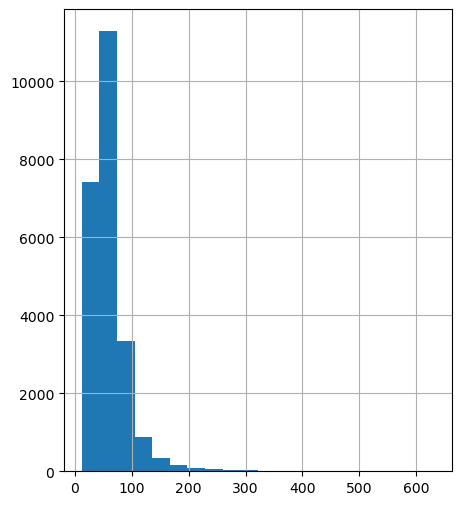

In [83]:
data['total_area'].hist(figsize=(5, 6), bins=20);

График выше тяготеет к нормальному распределению

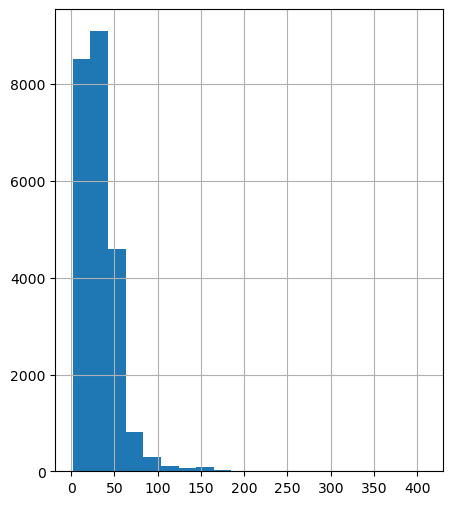

In [51]:
data['living_area'].hist(figsize=(5, 6), bins=20);

График выше тяготеет к распределению Пуассона

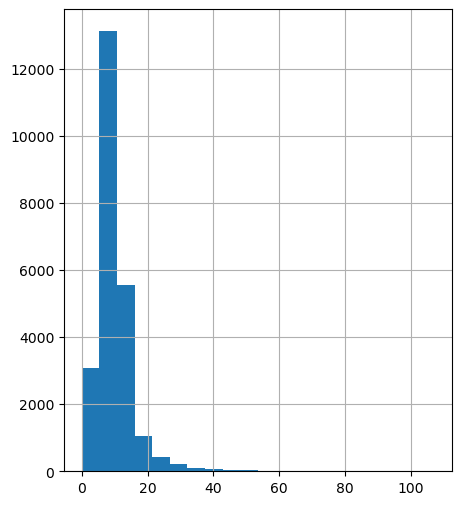

In [52]:
data['kitchen_area'].hist(figsize=(5, 6), bins=20);

График выше тяготеет к нормальному распределению 

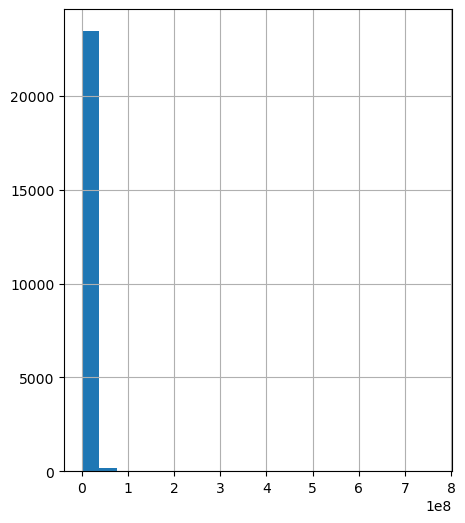

In [81]:
data['last_price'].hist(figsize=(5, 6), bins=20);
                       

График выше тяготеет к распределению Пуассона

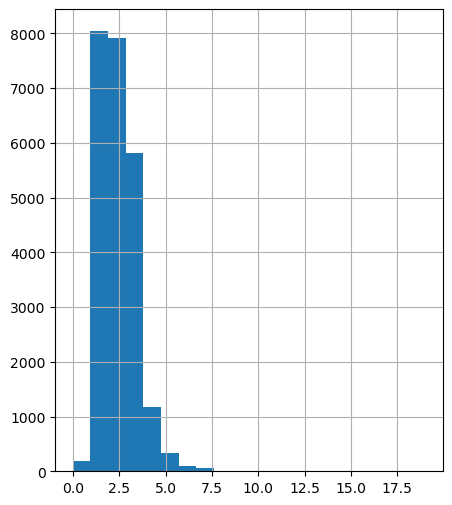

In [54]:
data['rooms'].hist(figsize=(5, 6), bins=20);

График выше тяготеет к нормальному распределению 

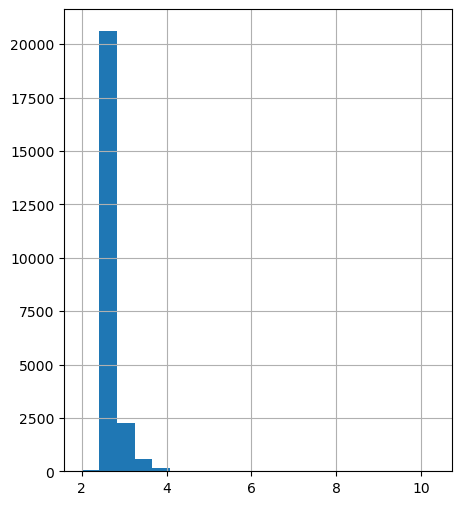

In [55]:
data['ceiling_height'].hist(figsize=(5, 6), bins=20); 

График выше тяготеет к  распределению Пуассона

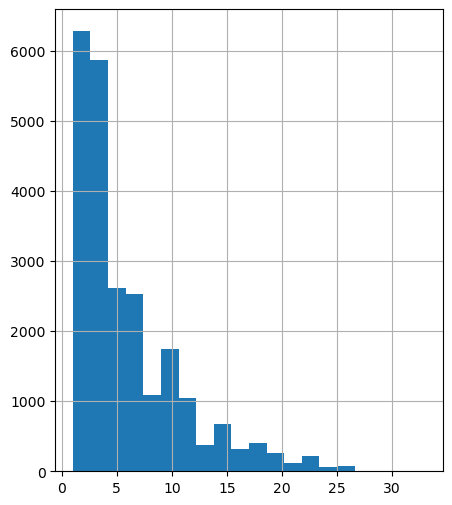

In [56]:
data['floor'].hist(figsize=(5, 6), bins=20); 

График выше тяготеет к  распределению Пуассона

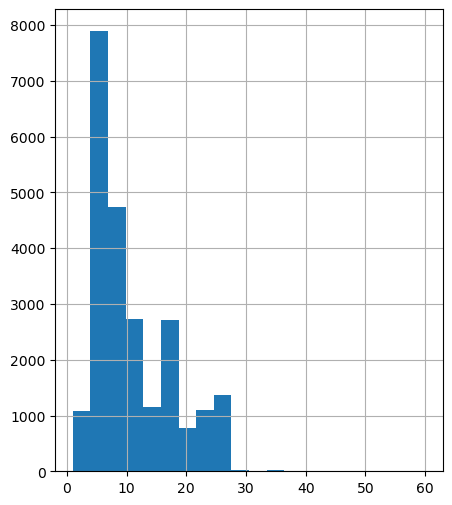

In [57]:
data['floors_total'].hist(figsize=(5, 6), bins=20); 

График выше тяготеет к нормальному распределению

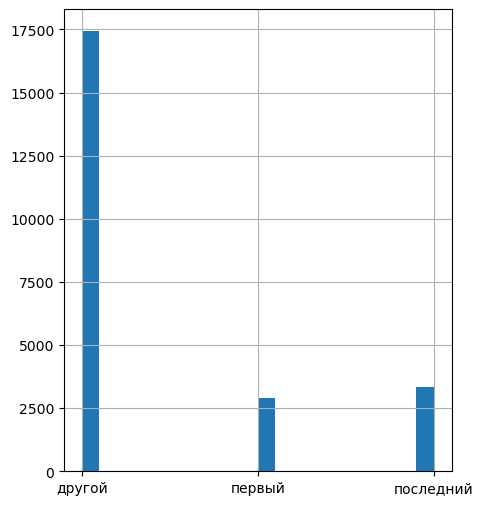

In [58]:
data['floor_type'].hist(figsize=(5, 6), bins=20); 

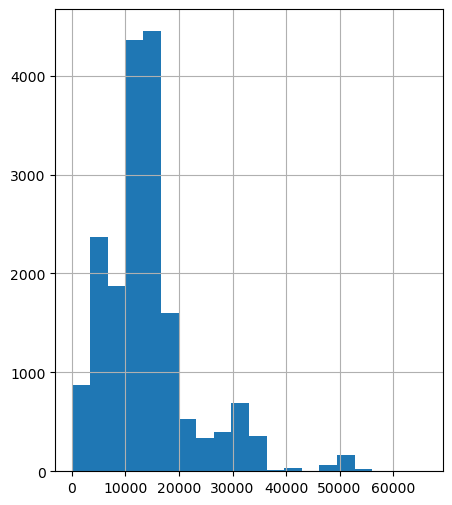

In [59]:
data['cityCenters_nearest'].hist(figsize=(5, 6), bins=20); 

График выше тяготеет к нормальному распределению 

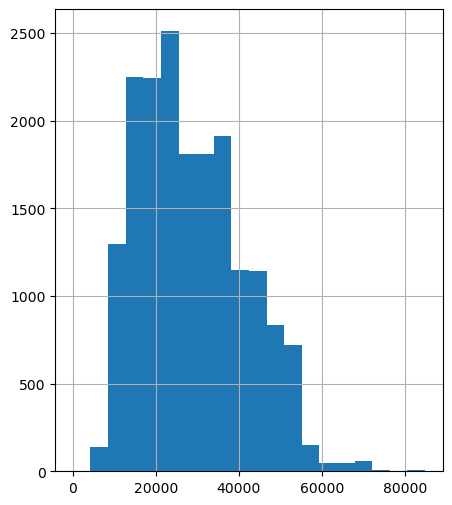

In [60]:
data['airports_nearest'].hist(figsize=(5, 6), bins=20); 

График выше тяготеет к нормальному распределению 

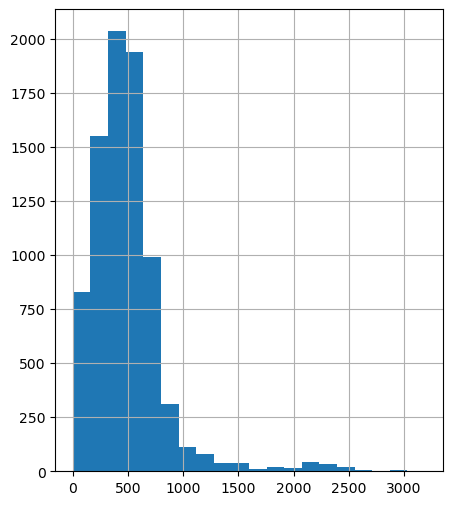

In [61]:
data['parks_nearest'].hist(figsize=(5, 6), bins=20); 

График выше тяготеет к нормальному распределению 

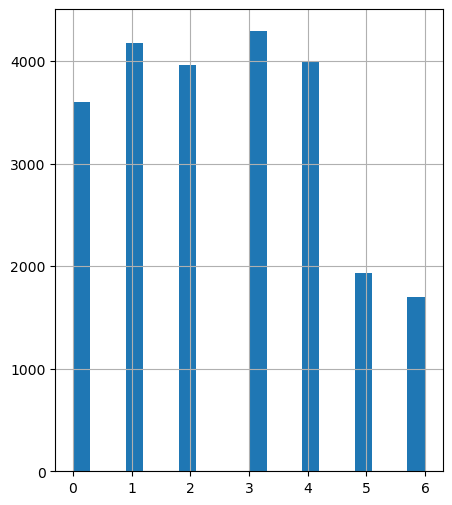

In [62]:
data['weekday'].hist(figsize=(5, 6), bins=20); 

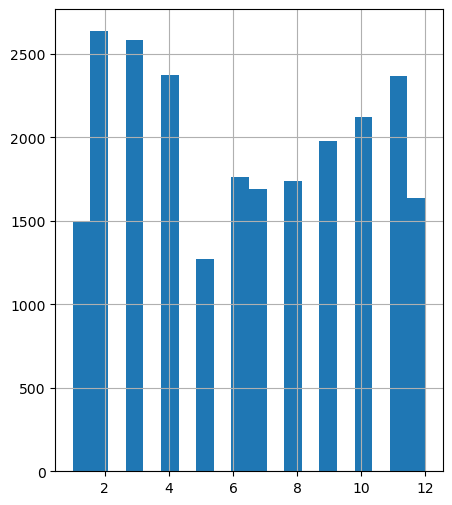

In [63]:
data['month'].hist(figsize=(5, 6), bins=20); 

95.0

180.93501170960187

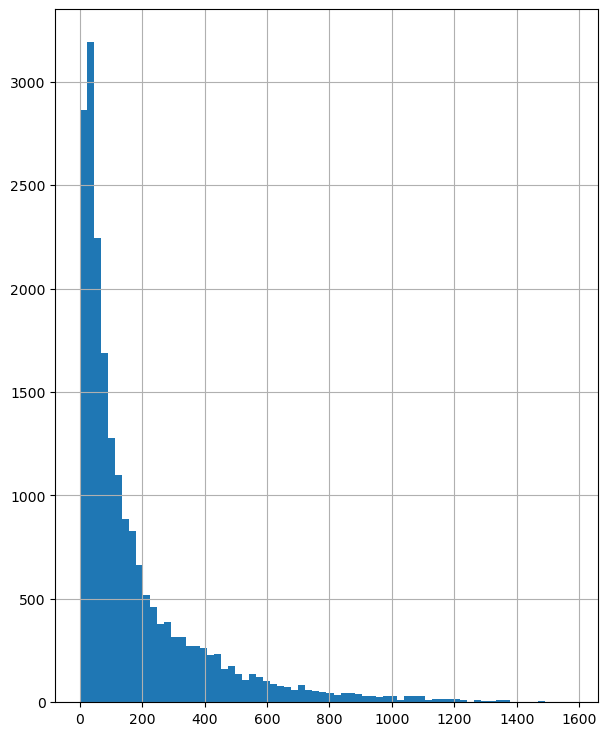

In [64]:
data['days_exposition'].hist(figsize=(7, 9), bins=70); 
display(data['days_exposition'].median())
display(data['days_exposition'].mean())

В среднем продажа занимает 95 дней, судя по гистограмме аномально долгие продажи занимаю более 600 дней, аномально быстрые менее 25 дней.

In [65]:
data_pivot = data.pivot_table(index=['total_area'], values='last_price', aggfunc='median')
display(data_pivot.head(10)) 


,last_price
total_area,
12.0,2400000.0
13.0,1850000.0
13.2,1686000.0
14.0,1190000.0
15.0,1725000.0
15.5,2450000.0
16.0,2100000.0
17.0,1700000.0
17.2,2050000.0


0.6432428716937952

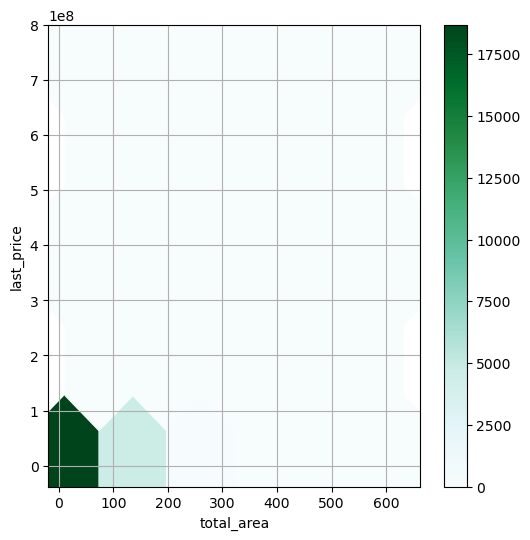

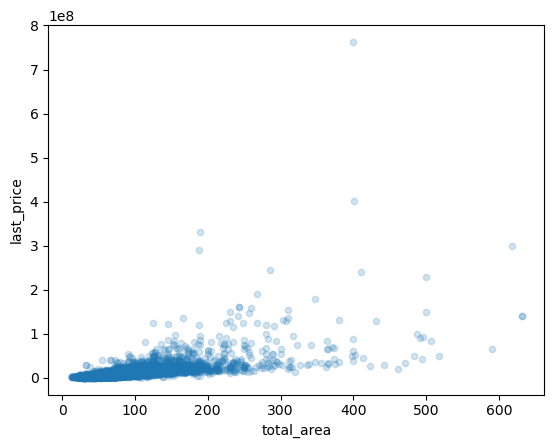

In [66]:
data.plot(x='total_area', y='last_price', kind='hexbin', gridsize=5, figsize=(6, 6), sharex=False, grid=True) 
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.2) 
display(data['total_area'].corr(data['last_price']))

Коэффициент Пирсона, показывающий корреляцию last_price от total_area, равен 0,64. Чем ближе коэффициент к 1 или -1, тем более выражена линейная взаимосвязь между величинами, чем ближе к 0, тем менее выражена линейная взаимосвязь, либо у взаимосвязи более сложный нелинейный характер. В нашем случае не наблюдаем ярко выраженной взаимосвязи. По графику можем сказать, что больше всего было продано небольших квартир по невысокой цене. 

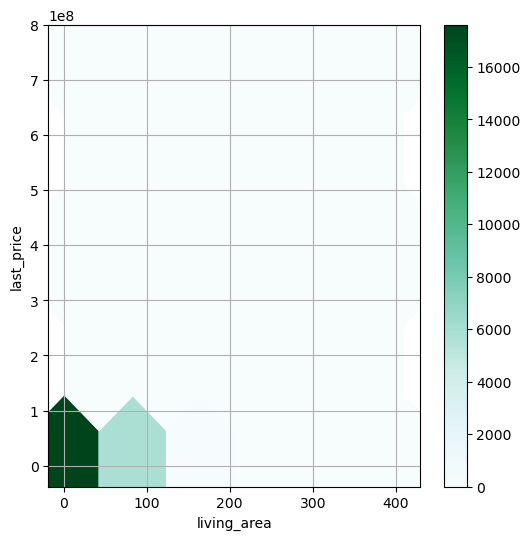

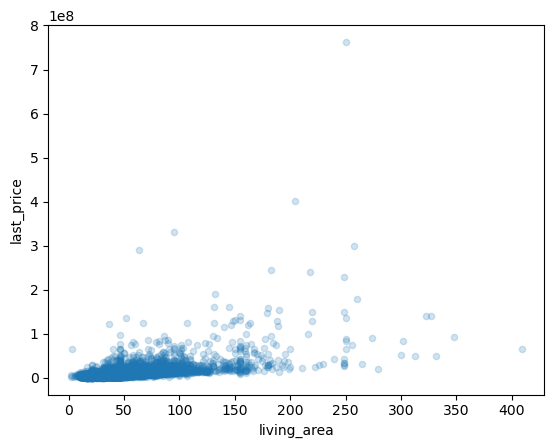

In [67]:
data.plot(x='living_area', y='last_price', kind='hexbin', gridsize=5, figsize=(6, 6), sharex=False, grid=True); 
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.2);

Не наблюдаем ярко выраженной взаимосвязи last_price и total_area. По графику можно сказать, что больше всего было продано квартир с небольшой жилой площадью по невысокой цене.

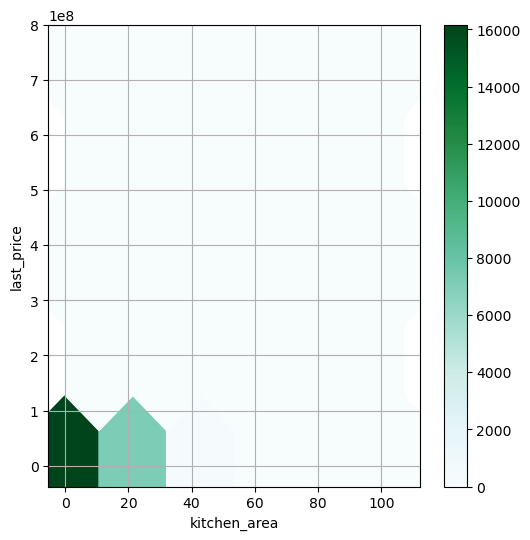

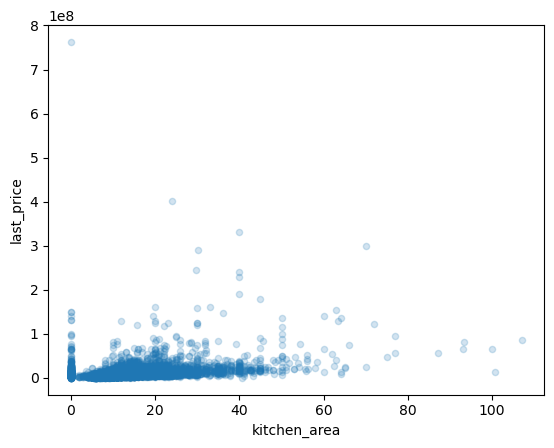

In [68]:
data.plot(x='kitchen_area', y='last_price', kind='hexbin', gridsize=5, figsize=(6, 6), sharex=False, grid=True);
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.2);

Не наблюдаем ярко выраженной взаимосвязи last_price и kitchen_area. По графику можно сказать, что больше всего было продано квартир с небольшой площадью кухни по невысокой цене.

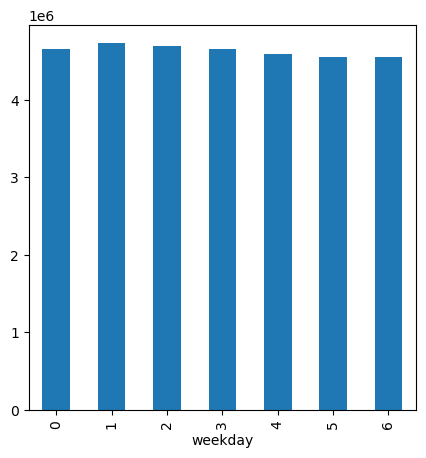

In [69]:
data.groupby('weekday')['last_price'].median().plot(kind='bar', figsize=(5, 5));

Цены на недвижимость практические не отличаются по дням недели.

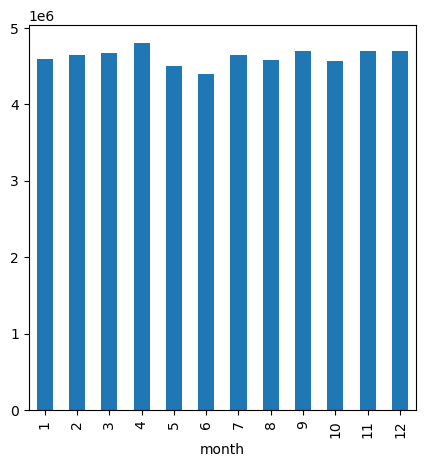

In [70]:
data.groupby('month')['last_price'].median().plot(kind='bar', figsize=(5, 5));

Цены на недвижимость не сильно отличаются по месяцам, максимальные в апреле, минимальные в июне.

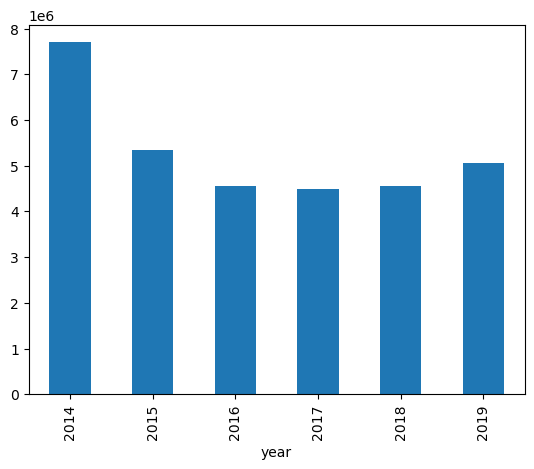

In [71]:
data.groupby('year')['last_price'].median().plot(kind='bar');

Самые высокие цены на квартиры были в 2014 году.

Чтобы рассмотреть потенциальную зависимость  цены от типа этажа, найдем медианы для каждого типа и построим график.

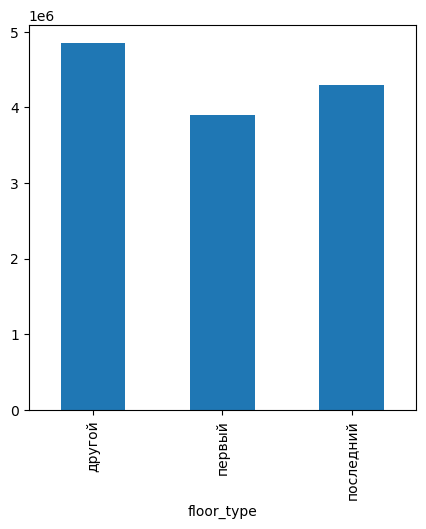

In [72]:
data.groupby('floor_type')['last_price'].median().plot(kind='bar', figsize=(5, 5));

In [73]:
display(data.groupby('floor_type')['last_price'].median().to_dict())

{'другой': 4850000.0, 'первый': 3900000.0, 'последний': 4300000.0}

Наблюдаем, что наибольшая цена была у квартир с типом этажа 'другой'

Из рассмотренных выше факторов больше всего влияния оказывают year, floor_type. Month, total_area, living_area, kitchen_area влияют незначительно.

In [74]:
data_ten=data.groupby('locality_name')['one_square_meter_price'].count().sort_values(ascending=False).head(10)

display(data_ten)

locality_name
санкт-петербург      15704
поселок мурино         554
поселок шушары         440
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                306
поселок кудрово        299
выборг                 237
Name: one_square_meter_price, dtype: int64

In [75]:
data_ten_cut=data.query('locality_name in ["санкт-петербург", "поселок мурино", "поселок шушары", "всеволожск", "пушкин", "колпино", "поселок парголово", "гатчина", "поселок кудрово", "выборг"]')
data_ten_final = data_ten_cut.groupby('locality_name').agg({'one_square_meter_price': ['count', 'median', 'min', 'max']}) 

display(data_ten_final)

one_square_meter_price                               \
                                   count         median           min   
locality_name                                                           
всеволожск                           398   65789.473684  31400.000000   
выборг                               237   58158.319871  18750.000000   
гатчина                              306   67860.569236  10507.246377   
колпино                              338   74723.748474  47957.371226   
поселок кудрово                      299   91860.465116  54160.346696   
поселок мурино                       554   85878.462169  50000.000000   
поселок парголово                    327   91642.857143  39205.955335   
поселок шушары                       440   76876.172608  47700.416089   
пушкин                               369  100000.000000  59836.065574   
санкт-петербург                    15704  104772.401062    111.834862   

                                 
                            max  
locality_name                    
всеволожск         6.404224e+05  
выборг             1.074731e+05  
гатчина            1.463158e+05  
колпино            1.250000e+05  
поселок кудрово    1.428571e+05  
поселок мурино     1.385802e+05  
поселок парголово  1.385224e+05  
поселок шушары     1.478261e+05  
пушкин             2.565217e+05  
санкт-петербург    1.907500e+06

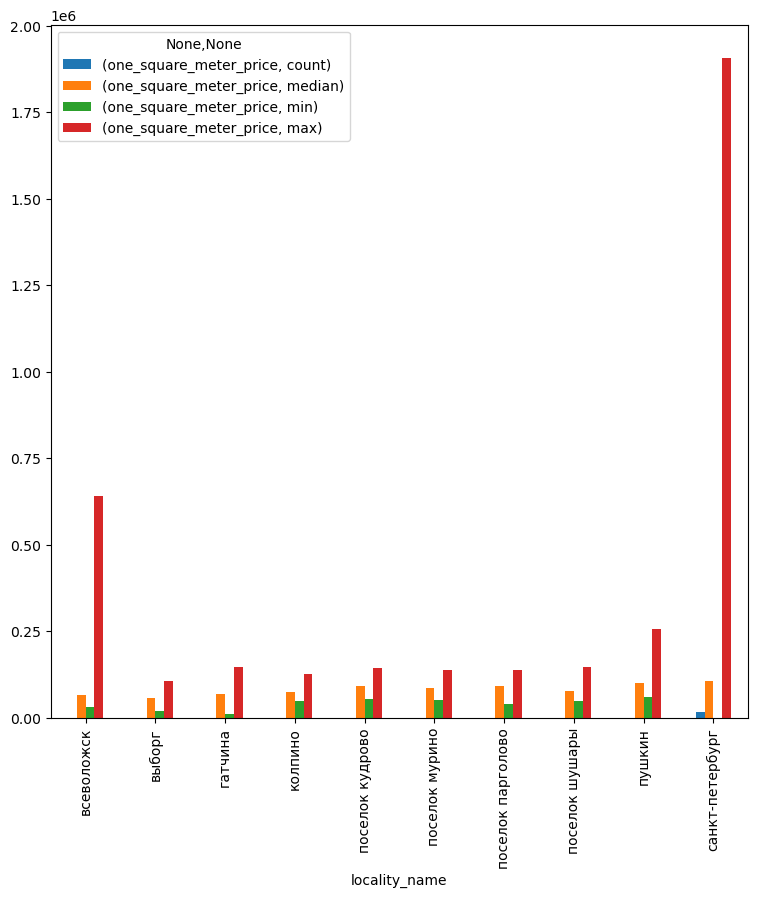

In [76]:
data_ten_final.plot(kind='bar', figsize=(9, 9));

In [77]:
data_st_petersburg=data.query('locality_name=="санкт-петербург"').groupby('distance_to_center', as_index=False)['last_price'].median()
display(data_st_petersburg)



,distance_to_center,last_price
0,0.0,17900000.0
1,1.0,11395000.0
2,2.0,10000000.0
3,3.0,8418000.0
4,4.0,9200000.0
5,5.0,9500000.0
6,6.0,8900000.0
7,7.0,7800000.0
8,8.0,7450000.0
9,9.0,5300000.0


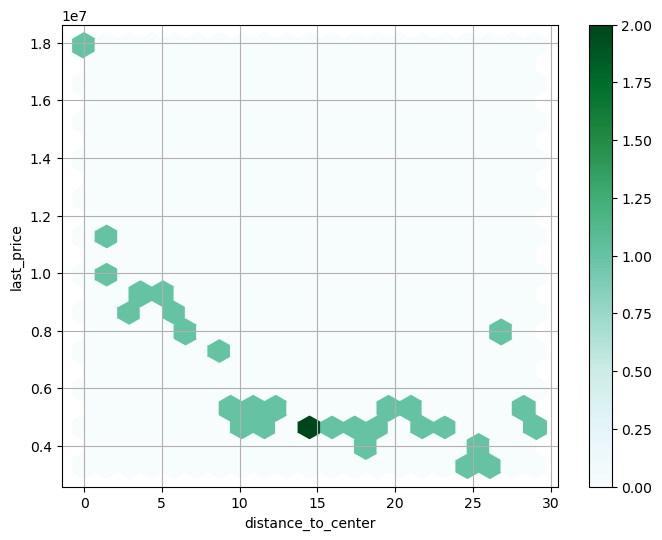

In [78]:
data_st_petersburg.plot(x='distance_to_center', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True); 

Самые дорогие объекты недвижимости находятся близко к центру, чаще всего покупают объекты недвижимости на расстоянии примерно 15 км от центра

## Вывод

**Предобработка данных**:

В ходе предобработки данных были заполнены некоторые пропущенные значения, заменен тип данных для first_day_exposition c object на datetime64, устранены неявные дубликаты и приведено к единому типу названий, удалены выбросы.
Заполнение пропущенных значений:
* Пропуски в столбце наличия балконов были заменены на 0
* Пропуски высоты потолков были заменены медианным значением высоты потолков
* Пропуски в столбце апартаментов были заменены на значение False
* Пропуски в жилой площади были заменены медианами жилой площади по категориям жилья в зависимости от общей площади, далее пропуски в площади кухни заменили на разницу между общей площадью и жилой площадью, деленную на 2

**Наблюдения**
* В среднем продажа квартиры занимает 95 дней, но может занимать от 25 до 600 дней
* Самые высокие цены на объекты недвижимости были в 2014 году. Медианная стоимость доходила до 8 млн.
* Этаж влияет на стоимость, наименее интересен первый этаж, далее последний этаж и наиболее интересны остальные этажи. Разница в цене между первым этажом и 'остальными' этажами составляет примерно 1 млн
* Самые дорогие объекты недвижимости в Санкт_Петербурге находятся близко к центру, примерно до 5 км от центра, чаще всего покупают объекты недвижимости на расстоянии примерно 15 км от центра
